In [1]:
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='BasicMotions'#'GunPoint'

# Load Data

In [3]:
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])
train_y = y_train
test_y=y_test


In [4]:
enc1=pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Model Training

In [5]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=6, num_pred_classes=n_pred_classes)
fit(model,train_loader,test_loader)
if dataset in os.listdir('../../ClassificationModels/models/'):
    print('Folder exists')
else: 
    os.mkdir(f'../../ClassificationModels/models/{dataset}')
torch.save(model.state_dict(), f'../../ClassificationModels/models/{dataset}/ResNet')
model.load_state_dict(torch.load(f'../../ClassificationModels/models/{dataset}/ResNet'))
model.eval()

test_preds, ground_truth = get_all_preds(model, test_loader)
ground_truth=np.argmax(ground_truth,axis=1)

sns.set(rc={'figure.figsize':(5,4)})
heatmap=confusion_matrix(ground_truth, test_preds)
sns.heatmap(heatmap, annot=True)
plt.savefig(f'../../ClassificationModels/models/{dataset}/ResNet_confusion_matrix.png')
plt.close()
acc= accuracy_score(ground_truth, test_preds)
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'../../ClassificationModels/models/{dataset}/classification_report.csv', index = False)

Epoch: 1, Train loss: 1.051, Val loss: 1.205
Epoch: 2, Train loss: 1.088, Val loss: 1.113
Epoch: 3, Train loss: 1.036, Val loss: 0.934
Epoch: 4, Train loss: 0.882, Val loss: 0.831
Epoch: 5, Train loss: 0.748, Val loss: 0.676
Epoch: 6, Train loss: 0.56, Val loss: 0.577
Epoch: 7, Train loss: 0.353, Val loss: 0.27
Epoch: 8, Train loss: 0.17, Val loss: 0.105
Epoch: 9, Train loss: 0.057, Val loss: 0.11
Epoch: 10, Train loss: 0.007, Val loss: 0.364
Epoch: 11, Train loss: 0.029, Val loss: 0.639
Epoch: 12, Train loss: 0.014, Val loss: 0.708
Epoch: 13, Train loss: 0.286, Val loss: 0.188
Epoch: 14, Train loss: 0.916, Val loss: 0.577
Epoch: 15, Train loss: 0.219, Val loss: 0.018
Epoch: 16, Train loss: 0.256, Val loss: 0.431
Epoch: 17, Train loss: 0.171, Val loss: 0.03
Epoch: 18, Train loss: 0.003, Val loss: 0.057
Epoch: 19, Train loss: 0.002, Val loss: 0.27
Epoch: 20, Train loss: 0.011, Val loss: 0.511
Epoch: 21, Train loss: 0.038, Val loss: 0.643
Epoch: 22, Train loss: 0.024, Val loss: 0.596
Epo

# Explanation Algo

In [6]:
from TSInterpret.InterpretabilityModels.Saliency.SaliencyMethods_PTY import Saliency_PTY
int_mod=Saliency_PTY(model, train_x.shape[-1],train_x.shape[-2], method='GS',mode='feat')

2022-07-06 14:53:17.139342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jacqueline/.local/share/virtualenvs/TSInterpret-NXJYnQDU/lib/python3.7/site-packages/cv2/../../lib64:
2022-07-06 14:53:17.139360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
item = np.array([test_x[0,:,:]])
label = int(np.argmax(test_y[0]))


In [8]:
exp=int_mod.explain(item,labels=label,TSR = True)

In [9]:
exp

array([[0.564236  , 0.        , 0.02038665, 0.01363044, 0.02869833,
        0.03020621, 0.01155373, 0.02629546, 0.28153259, 0.        ,
        0.03405538, 0.01999719, 0.62299069, 0.01513608, 0.0341003 ,
        0.42447822, 0.02940135, 0.34854487, 0.12913844, 0.03695392,
        0.19003512, 0.26469084, 0.01636873, 0.02176421, 0.64670803,
        0.40011074, 0.03224904, 0.27456061, 0.33631448, 0.01048475,
        0.20785571, 0.01098969, 0.50461141, 0.35293594, 0.        ,
        0.00805441, 0.        , 0.03279287, 0.26794416, 0.02085584,
        0.0270352 , 0.02963452, 0.36239883, 0.02117636, 0.02496276,
        0.03063399, 0.37475387, 0.02306317, 0.13446852, 0.        ,
        0.49276358, 0.03177458, 0.03677107, 0.02146541, 0.03490216,
        0.        , 0.0126043 , 0.27916077, 0.02695473, 0.03198886,
        0.        , 0.01892018, 0.08094546, 0.00965529, 0.03395016,
        0.29843615, 0.02501416, 0.0767547 , 0.16744734, 0.35439442,
        0.02638296, 0.2788825 , 0.01602755, 0.02

NOT Time mode


This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


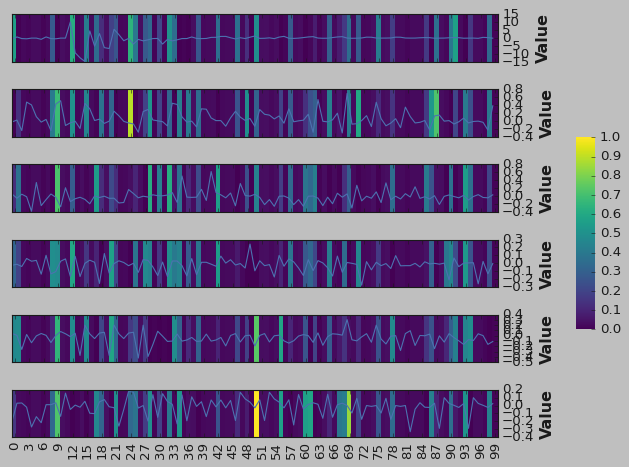

In [10]:
int_mod.plot(np.array([test_x[0,:,:]]),exp, figsize=(30,30))

NOT Time mode


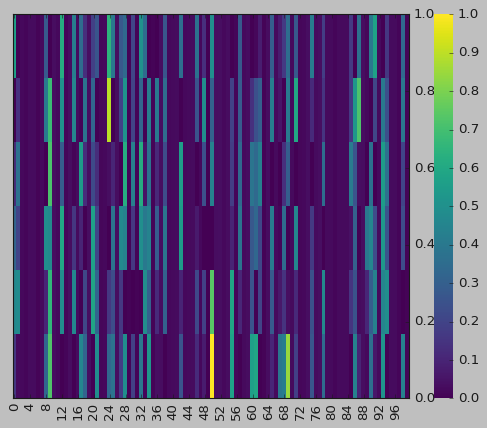

In [11]:
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)